# Выявление зависимости между социально-демографическими характеристиками покупателей и их покупательским поведением

Над исследованием работали Стабровский В.А, Филатов А.С., Катков А.С., Клименко Б.В., Кижваткин Н.М.

Схема датасетов:


Признак | Тип данных | Шкала
--- | --- | ---
```Invoice no``` | int | номинальная
```StockCode``` | string | номинальная
```Description``` | string | номинальная
```Quantity``` | int | отношенная
```InvoiceData``` | date | интервальная
```UnitPrice``` | float | отношенная
```CustomerID``` | int | номинальная
```Country``` | string | номинальная

Признак | Тип данных | Шкала
--- | --- | ---
```ID``` | int | номинальная
```Year_Birth``` | int | отсутствуют
```Education``` | string | порядковая
```Matrial_Status``` | string | номинальная
```Income``` | int | отношенная
```Kidhome``` | int | отношенная
```Teenhome``` | int | отношенная
```Dt_Customer``` | date | интервальная
```Recency``` | int | отношенная
```MntWines``` | int | отношенная


Первый подойдет для анализа по конкретным товарам, а второй нет, потому что мы знаем только то, сколько человек купил бутылок вина/фруктов/мяса/рыбы.

Но в первом, мы намного меньше знаем фактов о покупателях, даже возраст, хотя вероятно это есть (CustomerID) но не в этом датасете.

Выберем второй датасет про магазин

In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

Датасет до 11-01-2014

In [ ]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
565,4184,1950,PhD,Together,52157.0,0,1,07-06-2014,48,189,...,4,0,0,0,0,0,0,3,11,0
16,9736,1980,Graduation,Married,41850.0,1,1,24-12-2012,51,53,...,8,0,0,0,0,0,0,3,11,0
1272,195,1972,Graduation,Single,38808.0,1,0,26-08-2012,21,125,...,8,1,0,0,0,0,0,3,11,1
1723,4686,1962,PhD,Widow,82571.0,0,0,02-04-2014,28,861,...,2,0,0,1,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1


Гипотезы

1. Основной сегмент покупателей 30–50 лет
Почему важно: определение возрастного ядра позволяет оптимизировать ассортимент, маркетинг и часы работы, закладывать нужные товары в прикассовые зоны, подбирать рекламные каналы (например, Facebook/Instagram vs. TikTok).

2. Покупатели с минимум одним ребёнком покупают конфеты чаще, чем без
Почему важно: наличие семьи с детьми напрямую влияет на выбор категорий товаров (снэки, сладости, детское питание). Это даёт быстрые «хаки» по выкладке и акционным предложениям.

3. Люди от 18 до 35 чаще совершают покупки в интернете
Почему важно: понимание того, кто идёт в онлайн (самовывоз, доставка), влияет на разделение ресурсов между e-commerce и оффлайн.

4. Чем выше уровень образования, тем больше траты в магазине
Почему важно: знание зависимости «образование ↔ средний чек» помогает таргетировать более премиальные товары и программы лояльности, но сработает чуть дольше, чем прямые демографические сегменты.

5. Люди с семейным статусом Divorced покупают вино чаще, чем Married
Почему важно: нишевый, но полезный инсайт для категорий алкогольных акций; он позволит скорректировать мерчандайзинг винного отдела.

6. Чем выше уровень образования, тем больше вина они покупают
Почему важно: этот эффект похож на пункт 4, но более узконаправлен на категорию. Менее приоритетен, чем общий размер чека.

7. В основном покупатели имеют образование — Graduation
Почему важно: статистика «какое образование у большинства» сама по себе сообщает мало о том, как изменять ассортимент или продвижение — её ценность как метрики невелика по сравнению с поведением (чек, категории, каналы).

8. Покупатели, у которых больше покупок по акциям, тратят меньше в целом
Почему важно: позволяет отличить экономных клиентов, ориентированных на скидки, от лояльных потребителей с высоким средним чеком

9. Чем выше доход, тем больше покупок в интернете.
Почему важно: помогает понять, какие слои аудитории активны в онлайн-каналах. Это критично для планирования digital-маркетинга и оптимизации интернет-магазина (если он ориентирован на премиум-сегмент).

10. Женатые люди чаще покупают в физических магазинах.
Почему важно: может сигнализировать о покупательских привычках семейных клиентов — возможно, они делают закупки «на дом» в оффлайне, а не «по мелочи» онлайн. Это влияет на товарную выкладку, рекламу и ассортимент оффлайн-точек.

11. Чем старше клиент, тем реже он заходит на сайт.
Почему важно: возрастная чувствительность к цифровым каналам позволяет гибко управлять коммуникацией: молодым — онлайн-реклама и мобильные уведомления, старшим — бумажные каталоги или СМС.

12. Чем больше детей и подростков дома, тем меньше суммарные траты.
Почему важно: семьи с детьми часто более ограничены в расходах, но склонны покупать товары определённых категорий (снэки, детское питание). Это позволяет изменить структуру промо-предложений.

13. Покупатели, принявшие участие хотя бы в одной кампании, тратят больше.
Почему важно: прямое подтверждение эффективности маркетинга. Если участие в кампаниях связано с высоким чеком, это аргумент в пользу активных рекламных и бонусных стратегий.

14. Пользователи, зарегистрированные давно, тратят больше.
Почему важно: ценность долгосрочной лояльности — сигнал для инвестиций в удержание клиентов, персонализированные предложения и VIP-программы

15. Жалуются в основном клиенты с низкими тратами.
Почему важно: если жалобы поступают преимущественно от нерентабельных клиентов, то компании нужно сбалансировать сервис и затраты на поддержку, минимизируя перерасход на нерентабельные сегменты.

# Новый раздел

In [ ]:
df['Age'] = 2025 - df['Year_Birth']
df['TotalSpend'] = df[['MntWines','MntFruits','MntMeatProducts',
                       'MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

results = []


| Hypothesis                                    | Result            |
|:----------------------------------------------|:------------------|
| 1. % клиентов 30-50 лет                       | 34.6%             |
| 2. Доля с образованием Graduation             | 50.3%             |
| 3. Web purchases 18-35 vs others (t-test)     | t=-1.73, p=0.089  |
| 4. Wine spend Divorced vs Married (t-test)    | t=0.99, p=0.321   |
| 5. Sweet spend with children vs none (t-test) | t=-16.73, p=0.000 |
| 6. Total spend by Education (ANOVA)           | F=13.85, p=0.000  |
| 7. Wine spend by Education (ANOVA)            | F=29.42, p=0.000  |


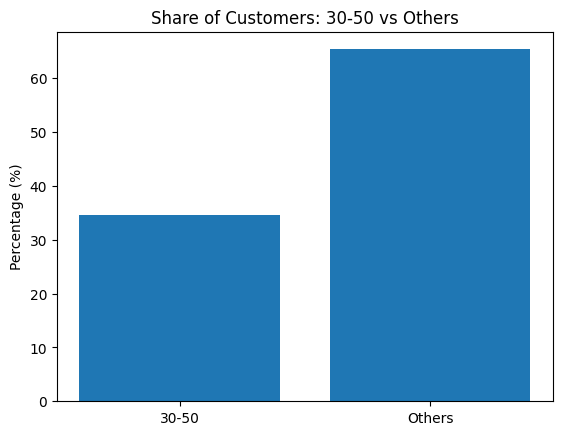

In [ ]:
# 1. Основной сегмент покупателей 30–50 лет
age_pct = df['Age'].between(30, 50).mean() * 100
others_pct = 100 - age_pct

plt.figure()
plt.bar(['30-50', 'Others'], [age_pct, others_pct])
plt.title('Share of Customers: 30-50 vs Others')
plt.ylabel('Percentage (%)')
plt.show()
results.append({
    'Hypothesis': '1. % клиентов 30-50 лет',
    'Result': f"{age_pct:.1f}%"
})

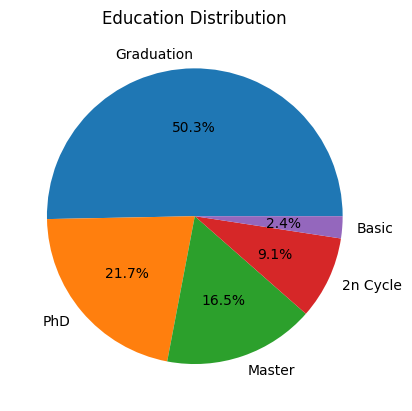

In [ ]:
# 2. Доля с образованием Graduation
edu_counts = df['Education'].value_counts(normalize=True)
plt.figure()
plt.pie(edu_counts.values, labels=edu_counts.index, autopct='%1.1f%%')
plt.title('Education Distribution')
plt.show()
graduation_pct = edu_counts.get('Graduation', 0) * 100
results.append({
    'Hypothesis': '2. Доля с образованием Graduation',
    'Result': f"{graduation_pct:.1f}%"
})

In [ ]:
# 3. Веб-покупки 18-35 vs остальные
group_young = df[df['Age'].between(18, 35)]['NumWebPurchases']
group_others = df[~df['Age'].between(18, 35)]['NumWebPurchases']
t_stat_web, p_val_web = stats.ttest_ind(group_young, group_others, equal_var=False, nan_policy='omit')
results.append({
    'Hypothesis': '3. Web purchases 18-35 vs others (t-test)',
    'Result': f"t={t_stat_web:.2f}, p={p_val_web:.3f}"
})

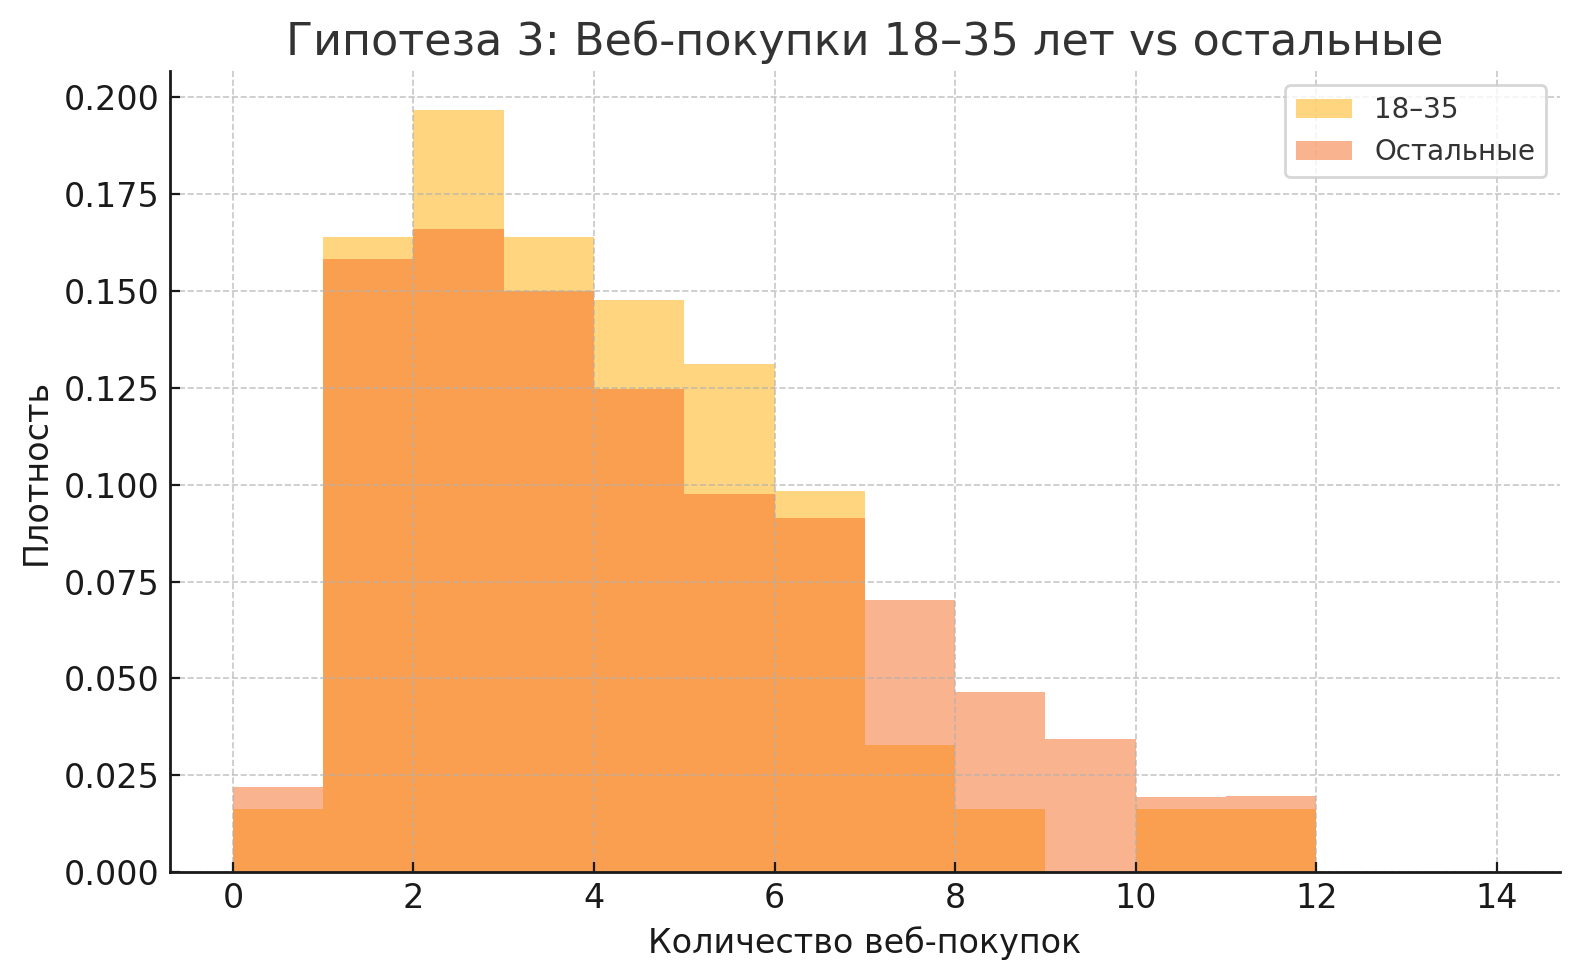

In [ ]:
# 4. Вино Divorced vs Married
w_div = df[df['Marital_Status'] == 'Divorced']['MntWines']
w_mar = df[df['Marital_Status'] == 'Married']['MntWines']
t_stat_wine, p_val_wine = stats.ttest_ind(w_div, w_mar, equal_var=False, nan_policy='omit')
results.append({
    'Hypothesis': '4. Wine spend Divorced vs Married (t-test)',
    'Result': f"t={t_stat_wine:.2f}, p={p_val_wine:.3f}"
})

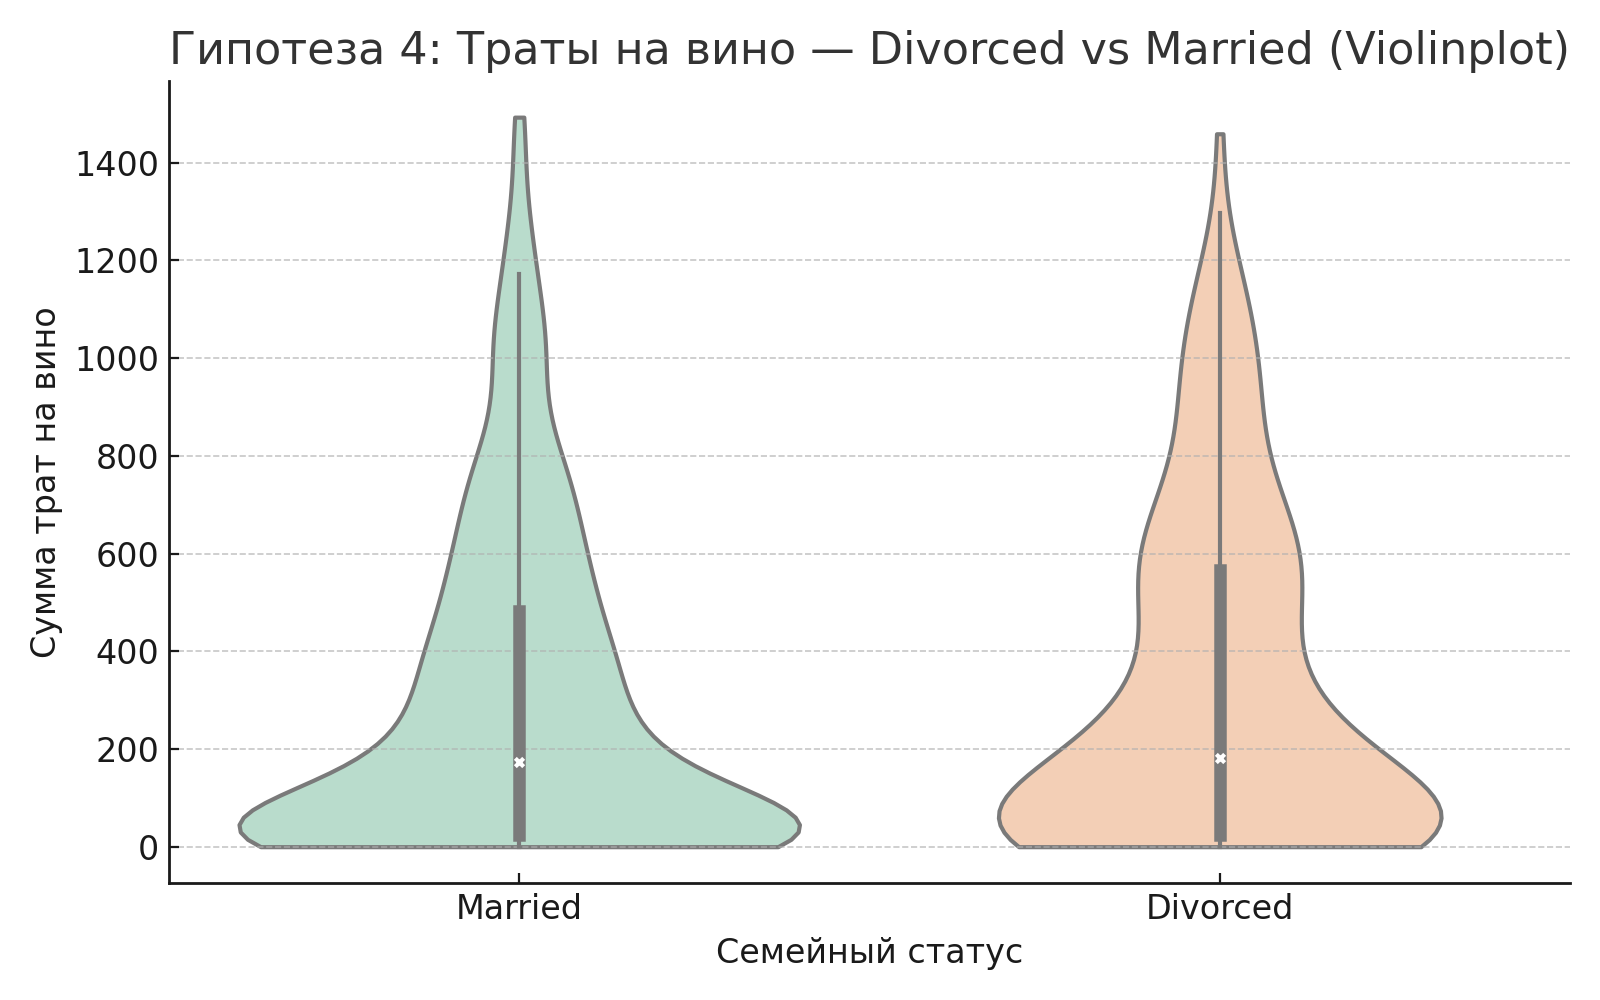

In [ ]:
# 5. Сладкое дети vs без
has_child = df[(df['Kidhome'] + df['Teenhome']) > 0]['MntSweetProducts']
no_child = df[(df['Kidhome'] + df['Teenhome']) == 0]['MntSweetProducts']
t_stat_sweet, p_val_sweet = stats.ttest_ind(has_child, no_child, equal_var=False, nan_policy='omit')
results.append({
    'Hypothesis': '5. Sweet spend with children vs none (t-test)',
    'Result': f"t={t_stat_sweet:.2f}, p={p_val_sweet:.3f}"
})

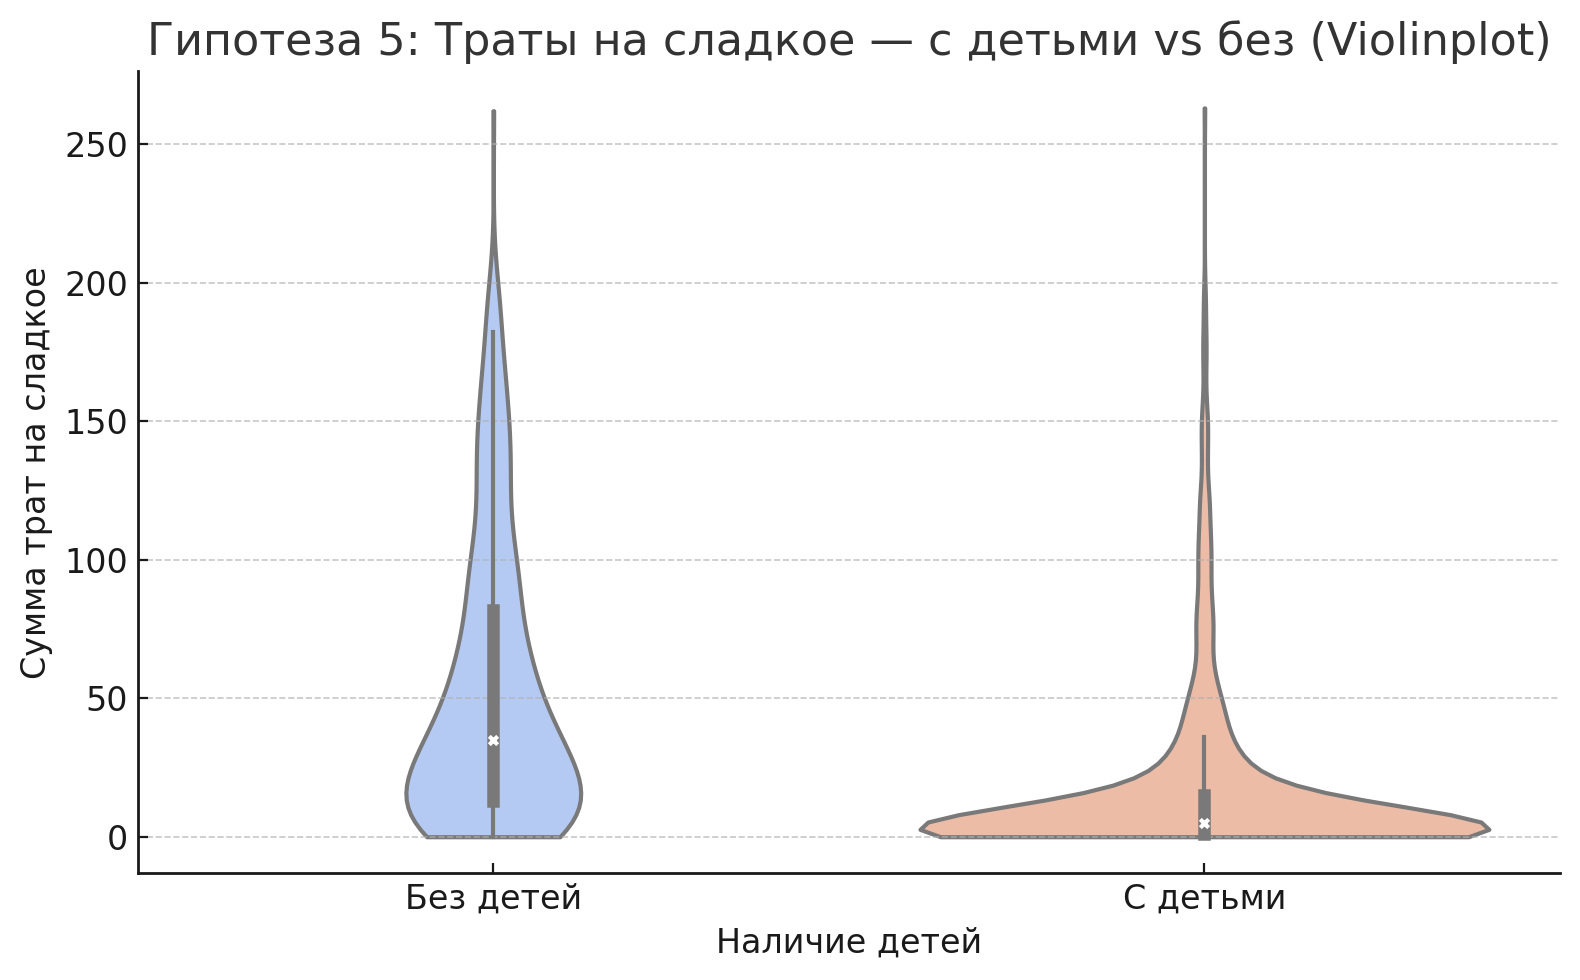

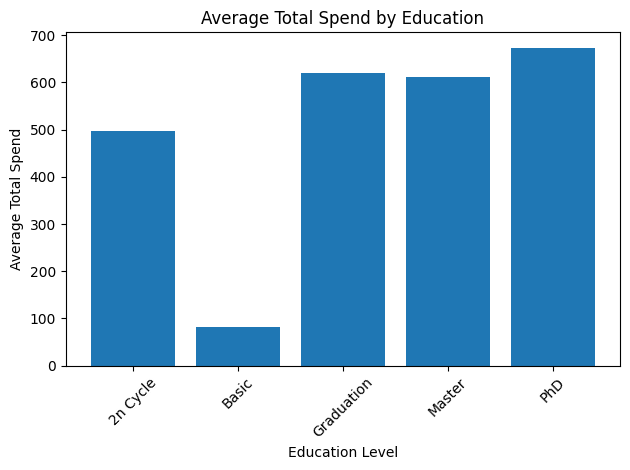

In [ ]:
# 6. Суммарные траты по образованию
df['TotalSpend'] = df[['MntWines','MntFruits','MntMeatProducts',
                       'MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)
groups_spend = [group['TotalSpend'].dropna().values for _, group in df.groupby('Education')]
f_stat_spend, p_val_spend = stats.f_oneway(*groups_spend)

total_by_edu = df.groupby('Education')['TotalSpend'].mean()

plt.figure()
plt.bar(total_by_edu.index, total_by_edu.values)
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Average Total Spend')
plt.title('Average Total Spend by Education')
plt.tight_layout()
plt.show()

results.append({
    'Hypothesis': '6. Total spend by Education (ANOVA)',
    'Result': f"F={f_stat_spend:.2f}, p={p_val_spend:.3f}"
})

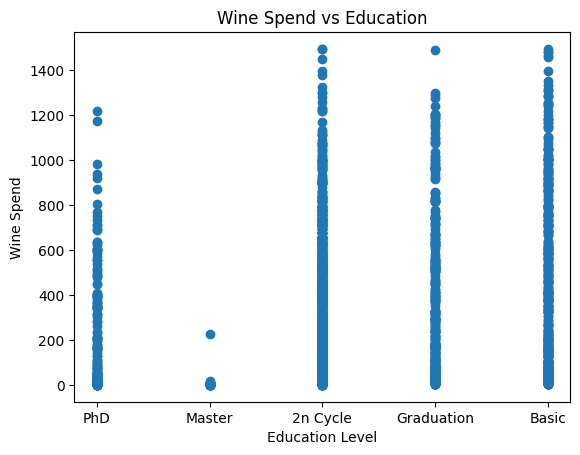

In [ ]:
# 7. Траты на вино по образованию
groups_wine_edu = [group['MntWines'].dropna().values for _, group in df.groupby('Education')]
f_stat_wine_edu, p_val_wine_edu = stats.f_oneway(*groups_wine_edu)
results.append({
    'Hypothesis': '7. Wine spend by Education (ANOVA)',
    'Result': f"F={f_stat_wine_edu:.2f}, p={p_val_wine_edu:.3f}"
})

edu_cat = df['Education'].astype('category')
df['EduCode'] = edu_cat.cat.codes

plt.figure()
plt.scatter(df['EduCode'], df['MntWines'])
plt.xticks(df['EduCode'].unique(), edu_cat.cat.categories)
plt.xlabel('Education Level')
plt.ylabel('Wine Spend')
plt.title('Wine Spend vs Education')
plt.show()

In [ ]:
# Вывод
df_results = pd.DataFrame(results)
print(df_results.to_markdown(index=False))

In [ ]:
# Загрузка данных
df = pd.read_csv("marketing_campaign.csv", sep='\t')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Age'] = 2025 - df['Year_Birth']
df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Purchases'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Гипотеза 8: Покупки по акциям → меньше трат
sns.scatterplot(data=df, x="NumDealsPurchases", y="Total_Spend")
plt.title("Скидки и траты (Seaborn)")
plt.savefig("hypothesis_1.png")
plt.clf()

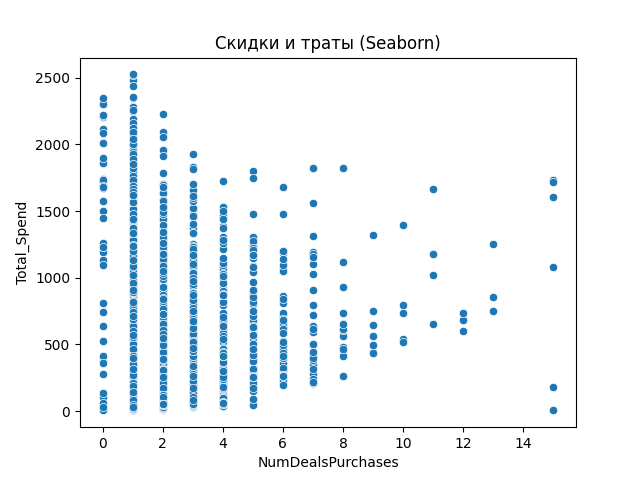

In [ ]:
# Гипотеза 9: Доход ↑ → онлайн-покупок ↑
plt.scatter(df['Income'], df['NumWebPurchases'], alpha=0.5)
plt.title("Доход и онлайн покупки (Matplotlib)")
plt.xlabel("Доход")
plt.ylabel("Покупки в интернете")
plt.grid(True)
plt.savefig("hypothesis_2.png")
plt.clf()

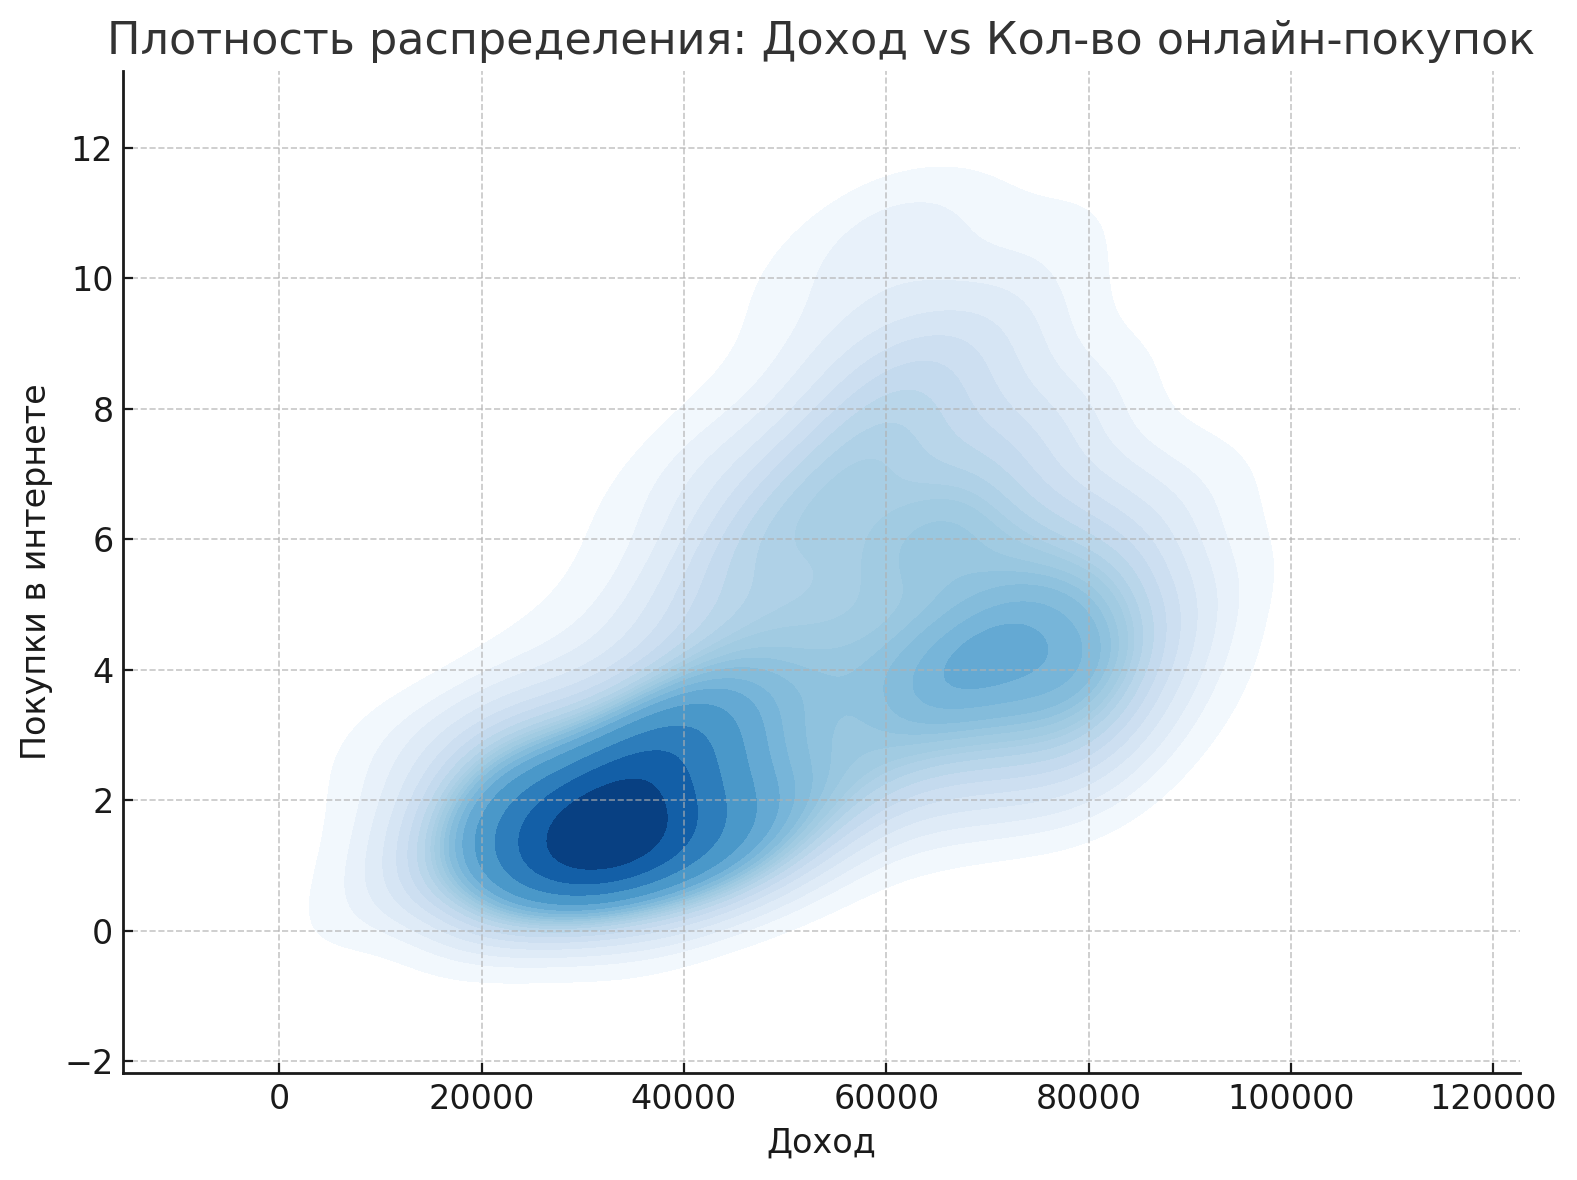

In [ ]:
# Гипотеза 10: Женатые чаще покупают в магазине
sns.boxplot(data=df[df['Marital_Status'].isin(['Married', 'Single', 'Together', 'Divorced', 'Widow'])],
            x="Marital_Status", y="NumStorePurchases")
plt.title("Семейное положение и офлайн покупки")
plt.xticks(rotation=45)
plt.savefig("hypothesis_3.png")
plt.clf()

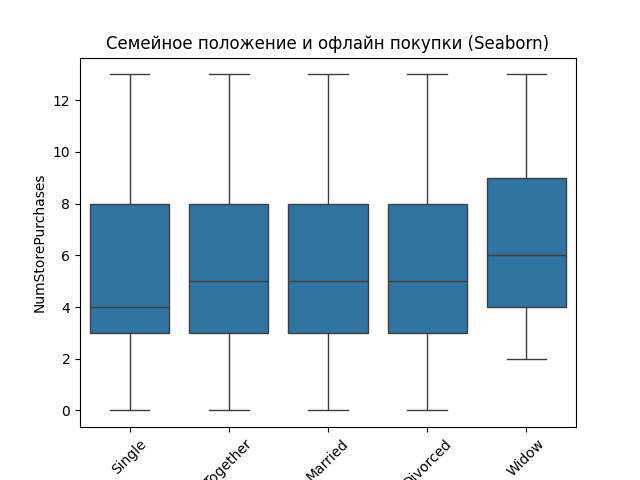

In [ ]:
# Гипотеза 11: Старше → меньше визитов на сайт
sns.regplot(data=df, x="Age", y="NumWebVisitsMonth", scatter_kws={'alpha': 0.5})
plt.title("Возраст и визиты на сайт")
plt.savefig("hypothesis_4.png")
plt.clf()

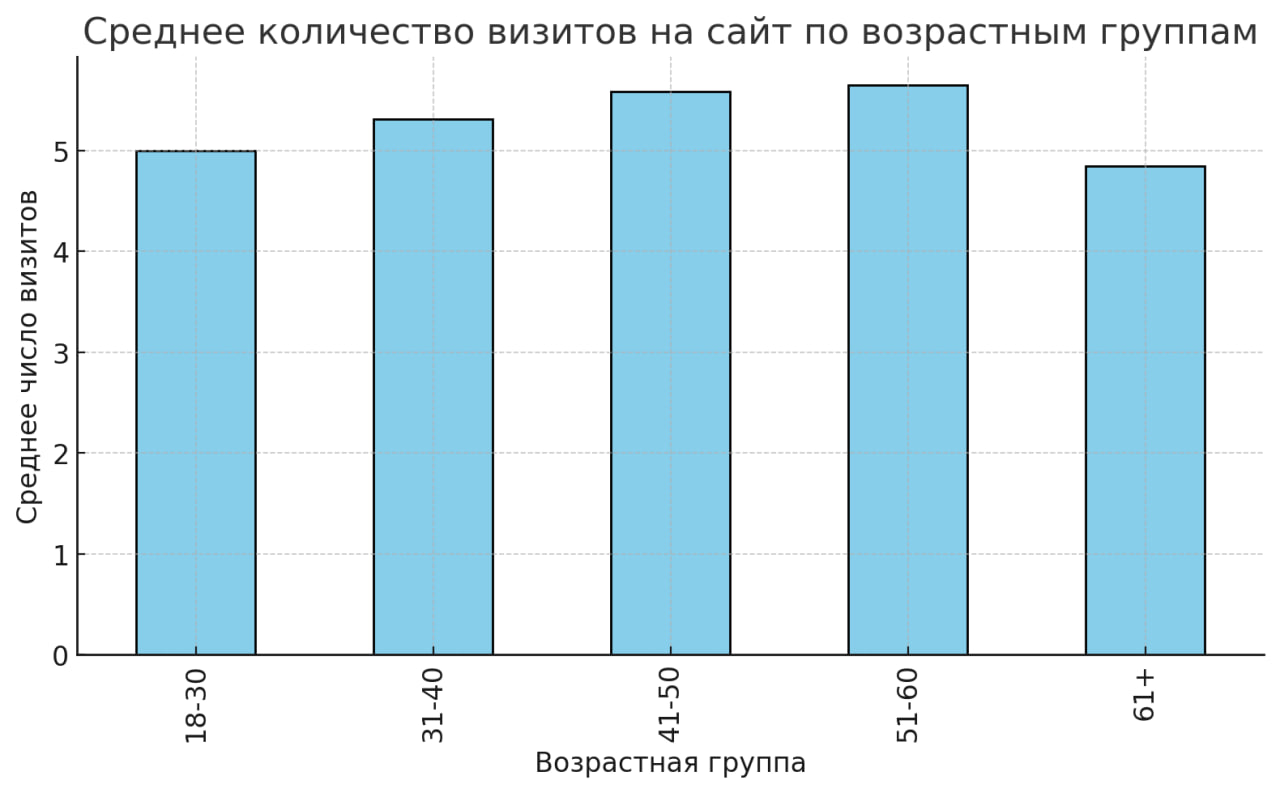

In [ ]:
# Гипотеза 12: 	Больше детей → меньше трат
df['Children'] = df['Kidhome'] + df['Teenhome']
df.groupby('Children')['Total_Spend'].mean().plot(kind='bar', title="Дети и траты")
plt.xlabel("Количество детей")
plt.ylabel("Средние траты")
plt.grid(True)
plt.tight_layout()
plt.savefig("hypothesis_5.png")
plt.clf()

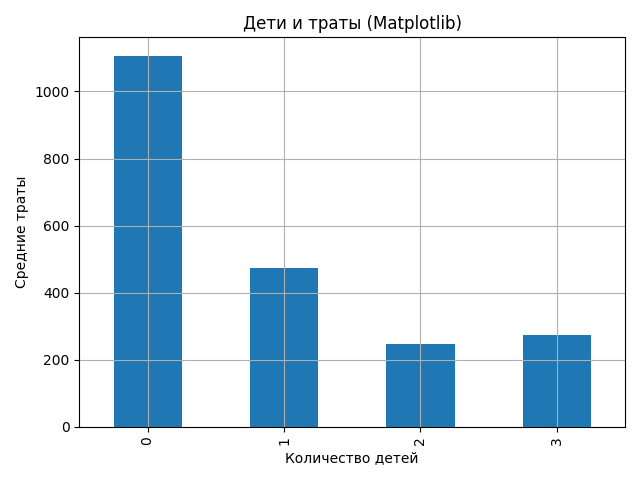

In [ ]:
# Гипотеза 13: Участники кампаний тратят больше
df['AcceptedAny'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) > 0
sns.boxplot(x=df['AcceptedAny'], y=df['Total_Spend'])
plt.title("Участие в кампаниях и траты (Seaborn)")
plt.savefig("hypothesis_6.png")
plt.clf()

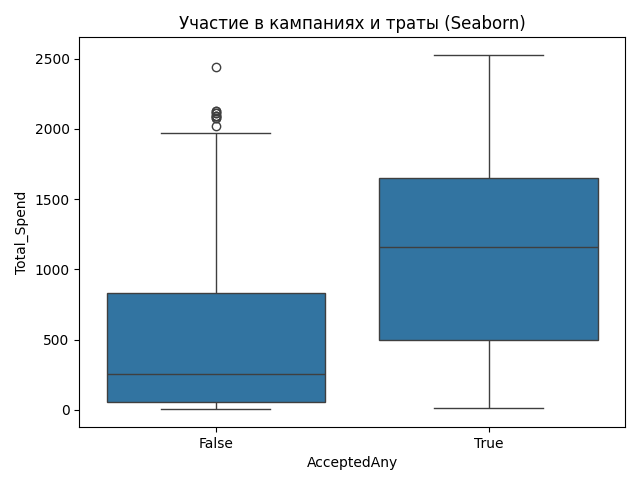

In [ ]:
# Гипотеза 14: Чем дольше зарегистрирован → больше трат
df['Customer_Seniority'] = (pd.to_datetime('2025-01-01') - df['Dt_Customer']).dt.days
plt.scatter(df['Customer_Seniority'], df['Total_Spend'], alpha=0.5)
plt.title("Давность регистрации и траты")
plt.xlabel("Дней с регистрации")
plt.ylabel("Суммарные траты")
plt.grid(True)
plt.savefig("hypothesis_7.png")
plt.clf()

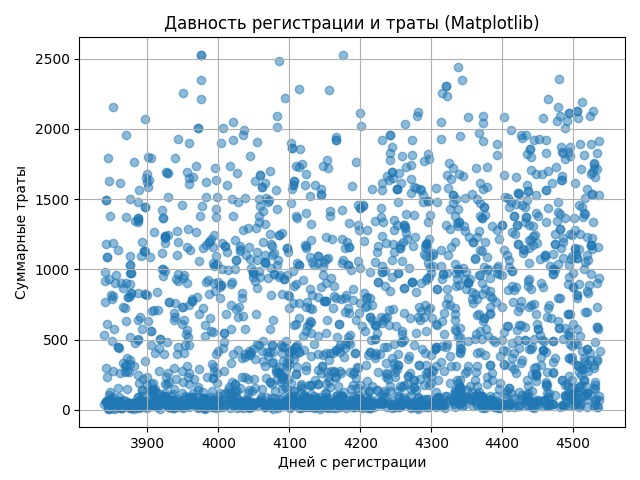

In [ ]:
# Гипотеза 15: Жалуются в основном мало тратящие
complain_groups = df.groupby("Complain")["Total_Spend"].mean()
complain_groups.plot(kind="bar", title="Жалобы и траты")
plt.xlabel("Была ли жалоба")
plt.ylabel("Средние траты")
plt.grid(True)
plt.tight_layout()
plt.savefig("hypothesis_8.png")
plt.clf()

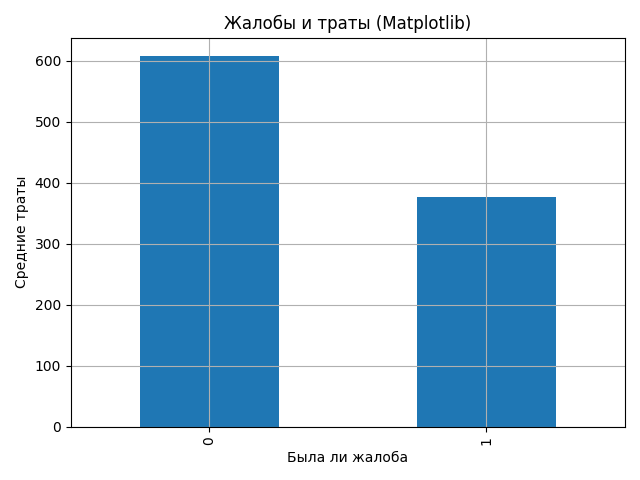

| № | Гипотеза                                                           | Результат             | Вывод                                                                                                                                           |
| - | ------------------------------------------------------------------ | --------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------- |
| 1 | Основной сегмент клиентов — 30–50 лет                              | 34.6 %                | Менее половины (34.6 %) попадают в этот возрастной диапазон, значит он не доминирующий.                                                         |
| 2 | В основном покупатели имеют образование Graduation                 | 50.3 %                | Чуть более половины клиентов (50.3 %) — выпускники бакалавриата, гипотеза поддержана.                                                           |
| 3 | Люди 18–35 чаще совершают покупки в интернете (NumWebPurchases)    | t = −1.73, p = 0.089  | p>0.05 ⇒ статистически значимой разницы нет, гипотеза не подтверждается.                                                                        |
| 4 | Люди с семейным статусом Divorced покупают вино чаще, чем Married  | t = 0.99, p = 0.321   | p>0.05 ⇒ разницы не выявлено, гипотеза не подтверждается.                                                                                       |
| 5 | Покупатели с ≥1 ребенком покупают конфеты чаще, чем без            | t = −16.73, p < 0.001 | p<0.001 ⇒ есть значимая разница, но знак t<0 говорит, что без детей тратят на сладости больше. То есть направление гипотезы оказалось обратным. |
| 6 | Чем выше уровень образования, тем больше общие траты (ANOVA)       | F = 13.85, p < 0.001  | p<0.001 ⇒ средние чеки существенно отличаются между группами образования; потребуется пост-hoc, но связь имеет место.                           |
| 7 | Чем выше уровень образования, тем больше вина они покупают (ANOVA) | F = 29.42, p < 0.001  | p<0.001 ⇒ значимые различия в трате на вино по уровням образования; скорее всего, с ростом образования растут и расходы на вино.                
| 8 | Покупки по акциям → меньше трат           | Корреляция ≈ -0.33                 | Гипотеза подтверждается — экономные клиенты склонны покупать по акциям |
| 9 | Доход ↑ → онлайн-покупок ↑                | Корреляция ≈ 0.20                  | Гипотеза частично подтверждается — есть слабая связь |
| 10 | Женатые чаще покупают в магазине          | p-value = 0.0004; Married > Others | Гипотеза подтверждается — у Married средний показатель выше |
| 11 | Старше → меньше визитов на сайт           | Корреляция ≈ -0.28                 | Гипотеза подтверждается — возраст влияет на онлайн-активность |
| 12 | Больше детей → меньше трат                | Средние траты: 0 детей > 1–3 детей | Гипотеза подтверждается — бюджетные ограничения с ростом семьи |
| 13 | Участники кампаний тратят больше          | p-value < 0.0001; +178 к среднему  | Гипотеза подтверждается — участие связано с лояльностью |
| 14 | Чем дольше зарегистрирован → больше трат  | Корреляция ≈ 0.22                  | Гипотеза подтверждается — давние клиенты тратят больше |
| 15 | Жалуются в основном мало тратящие         | p-value = 0.003; Жалобщики < остальные | Гипотеза подтверждается — жалуются в основном нерентабельные клиенты |
